UnitConversionError: Can only apply 'subtract' function to quantities with compatible dimensions

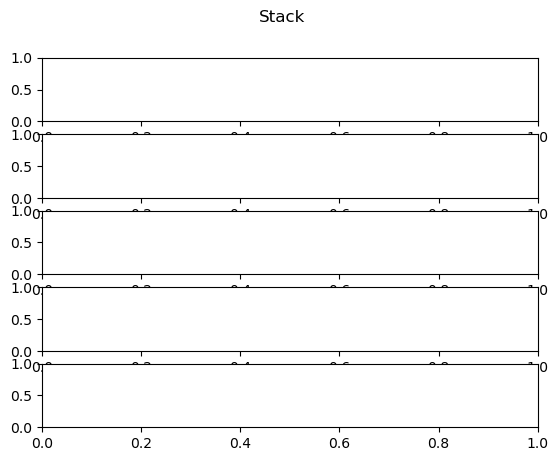

In [32]:
import pandas as pd
import numpy as np

from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

from astropy import units as u
from astropy import coordinates as coord
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.utils.data import get_pkg_data_filename

from urllib.request import urlretrieve


# Define Shell function for constant E. The general 
# modeling space is around 100-200 parsecs. E is constant in 
# this function, resulting in D being constant.

# R = np.linspace(0, 100, 1000);
# t = np.linspace(0, 100, 100);

# R -> The distance from the centre
# t -> The time
# D -> Diffusion coefficient
# E is the energy, no energy is lost in this system

# R -> The distance from the centre
# t -> The time
# D -> Diffusion coefficient
# E is the energy, no energy is lost in this system

def Rshell(t):
    R = 0.31*(10)**(1/5)*5*(t)**(2/5)
    return R * u.parsec

def Tesc(E):
    ts = 1600 * u.year
    Emax = 5 * u.PeV 
    delta = 2.48
    return ts*(E/Emax)**(-1/delta)

def diffusion(E):
    x = 0.1
    Dn = 10**28 * 0.1 
    dif = x*Dn

def distribution(E, R, t, D):
    delta = 0.45;
    Tpp = 6*(10**7) * u.year
    Rdif = 2 * np.sqrt(D * t) 

    N = 1
    alpha = 2.7

    first = ((np.pi**(1/2))*(Rdif**2)+2*(np.pi**(1/2)*(Rshell(t))**2)+4*Rshell(t)*(Rdif)**2)

    dist = N*(E**-alpha)*(first/(np.pi**(1/2)*(Rdif)**2))**(-1)*(1/(np.pi**(3/2)*(Rdif)**3))*np.exp(-(R-Rshell(t))**2/(Rdif)**2)

    return dist

dc = 0.5    # Distribution constant

var = input("What variable to plot against? (r, E, t)")

if(var == 'r'):
    en = float(input("At what energy ? ").strip())
    if(en == 0):
        en = 100000

    fig, axs = plt.subplots(5)
    fig.suptitle("Stack")

    for i in range (5):
        t = 20*(i + 20)
        R1 = np.linspace(Rshell(t) * u.parsec, 100000 * u.parsec, 100000)
        axs[i].plot(R1, distribution(en, R1, t, dc))
        axs[i].set_yscale("log")

elif(var == 'E'):
    E1 = np.linspace(10**12 * u.eV, 10**15 * u.eV, 100000)

    rad = float(input("At what radius in parsecs? ").strip())
    fig, axs = plt.subplots(5)
    fig.suptitle("Stack")

    for i in range (5):
        t = 20*(i + 20)
        axs[i].plot(E1, distribution(E1, rad, t, dc))
        axs[i].set_yscale("log")
        axs[i].set_xscale("log")

elif(var == 't'):
    t1 = np.linspace(0, 100, 100);

    rad = float(input("At what radius in parsecs? ").strip())
    en = float(input("At what energy ? ").strip())
    if(en == 0):
        en = 100000

    plt.plot(t1, distribution(en, rad, t1, dc))